# Stackoverflow Data
## by Anonymous Data Sci

## Table of Content


## Introduction
For this project I decided to analyse the Stackoverflow dataset: 
https://insights.stackoverflow.com/survey
using the CRISP-DM Process of:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## Business Understanding
In 2020 the pandemic changed the way we worked. In the Dataset I want to understand in which way home office was adapted and changed over the pandemic. Question that can be asked is:
- How many adaption
- Which countries
- etc

## Data Unterstanding and Prepare the Data

In [617]:
# Import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.cross_validation import train_test_split
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn import tree
from scipy.stats import ks_2samp
%matplotlib inline

In [618]:
# Load Data

#2019
data_2019 = pd.read_csv('./2019/survey_results_public.csv')
scheme_2019 = pd.read_csv('./2019/survey_results_schema.csv')
#2020
data_2020 = pd.read_csv('./2020/survey_results_public.csv')
#2021
data_2021 = pd.read_csv('./2021/survey_results_public.csv')

In [619]:
data_2019.shape

(88883, 85)

In [620]:
#What does the suvery look like
data_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [621]:
#The data inlcudes 47 columss and 83439 rows
# Which Data would be intreseting to understand home office adaption
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [622]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

Extract the columns that are intersting for the home office analysis
- Country
- Empoyment
- Ed Level
- OrgSize
- Years Code
- JobSatisifaction
- JobSeek
- Last Hire Date
- Work Remote
- Work Loc
- Age
- Gender
- Work Week Hours


In [623]:
# Cleaning Data
data_2019.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

In [624]:
data_2020.Employment.value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [625]:
data_2019_clean = data_2019[(data_2019.Employment!='Retired')& (data_2019.Employment!='Not employed, but looking for work') & (data_2019.Employment!='Not employed, and not looking for work')]

In [626]:
data_2019_clean.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Employed part-time                                       4469
Name: Employment, dtype: int64

In [627]:
data_2020_clean = data_2020[(data_2020.Employment!='Retired')& (data_2020.Employment!='Not employed, but looking for work') & (data_2020.Employment!='Not employed, and not looking for work') & (data_2020.Employment!='Student')]
data_2020_clean.Employment.value_counts()

Employed full-time                                      45270
Independent contractor, freelancer, or self-employed     5672
Employed part-time                                       2217
Name: Employment, dtype: int64

In [628]:
data_2019_clean.WorkRemote.value_counts()

Less than once per month / Never                           30220
A few days each month                                      17242
All or almost all the time (I'm full-time remote)           8465
Less than half the time, but at least one day each week     6320
It's complicated                                            3675
More than half, but not all, the time                       2376
About half the time                                         1986
Name: WorkRemote, dtype: int64

#delete all rows that dont have information on remote work
data_2019_clean = data_2019_clean.dropna(subset=['WorkRemote'], axis=0)
data_2020_clean = data_2020_clean.dropna(subset=['WorkRemote'], axis=0)

## 1. How did the work amount change during the pandemic

To answer this question, we look at the the distribution working hours of the employed. And perform a Two-sample Kolmogorov–Smirnov test, to see if the whether two underlying one-dimensional probability distributions differ. 

To gather the right data, we prepare the data set.
### Data preperation

In [629]:
# Have a look at how the emploment status is
data_2019.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

In [630]:
# Have a look at how the emploment status is
data_2020.Employment.value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [631]:
#Only keep the date that have currently a job
data_2019_clean = data_2019[(data_2019.Employment!='Retired')& (data_2019.Employment!='Not employed, but looking for work') & (data_2019.Employment!='Not employed, and not looking for work')]
data_2019_clean.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Employed part-time                                       4469
Name: Employment, dtype: int64

In [632]:
data_2020_clean = data_2020[(data_2020.Employment!='Retired')& (data_2020.Employment!='Not employed, but looking for work') & (data_2020.Employment!='Not employed, and not looking for work') & (data_2020.Employment!='Student')]
data_2020_clean.Employment.value_counts()

Employed full-time                                      45270
Independent contractor, freelancer, or self-employed     5672
Employed part-time                                       2217
Name: Employment, dtype: int64

In [633]:
#drop the rows that dont contain no values for work hours
data_2019_clean = data_2019_clean.dropna(subset=['WorkWeekHrs'], axis=0)
data_2020_clean = data_2020_clean.dropna(subset=['WorkWeekHrs'], axis=0)

In [634]:
#have a look at the numeric distribution of the work hours
data_2019_clean.WorkWeekHrs.value_counts()

40.00    30131
45.00     6352
50.00     4656
35.00     3159
37.50     1662
         ...  
40.75        1
26.25        1
7.25         1
39.75        1
8.20         1
Name: WorkWeekHrs, Length: 207, dtype: int64

In [635]:
#what is the highest value
data_2019_clean.WorkWeekHrs.max()

4850.0

That seems unrealistic, letc restrict the working hours to a realistic maximal 120 hours per week. Which would meen 17 hours every day of the week.


In [636]:
data_2020_clean = data_2020_clean[(data_2020_clean.WorkWeekHrs <= 120)]
data_2019_clean = data_2019_clean[(data_2019_clean.WorkWeekHrs <= 120)]

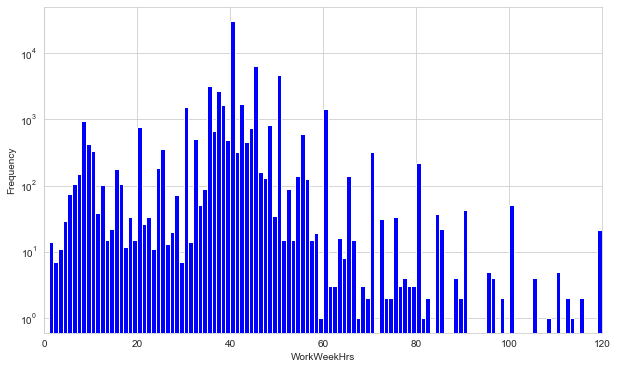

In [637]:
# plot the distribution of Working hours
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, data_2019_clean['WorkWeekHrs'].max()+1,1)
plt.hist(data = data_2019_clean, x = 'WorkWeekHrs', bins = bin_edges, color = 'blue')
plt.xlim(0,120)
plt.yscale('log')
plt.xlabel('WorkWeekHrs')
plt.ylabel('Frequency');

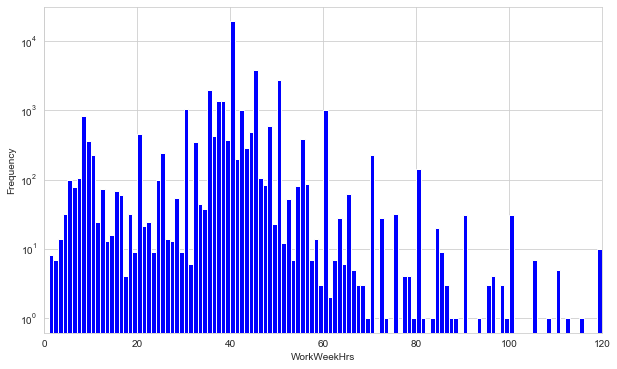

In [638]:
# plot the distribution of Working hours
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, data_2020_clean['WorkWeekHrs'].max()+1, 1)
plt.hist(data = data_2020_clean, x = 'WorkWeekHrs', bins = bin_edges, color = 'blue')
plt.xlim(0,120)
plt.yscale('log')
plt.xlabel('WorkWeekHrs')
plt.ylabel('Frequency');

In [639]:
data_2019_clean.groupby(['Employment']).mean()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Employment,,,,,,
Employed full-time,44487.214639,4.132249e+11,133360.773013,40.930436,4.915262,31.391920
Employed part-time,44686.884339,7.899481e+05,42990.055528,27.279844,4.219499,26.584227
"Independent contractor, freelancer, or self-employed",44302.998042,2.246183e+12,105448.736961,39.738604,5.612204,34.999828


In [640]:
data_2020_clean.groupby(['Employment']).mean()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
Employment,,,,,
Employed full-time,29408.812404,31.878082,3.751726e+242,107184.840941,40.401254
Employed part-time,31865.140769,28.015302,1.606849e+06,41127.837598,28.755923
"Independent contractor, freelancer, or self-employed",29544.958703,36.107623,3.443683e+09,89070.825501,39.973271


In [641]:
data_2019_clean.WorkWeekHrs.values

array([40., 80., 55., ..., 39., 40., 48.])

In [642]:
# Compare the two working hours distributions of 2019 and 2020
""" Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.
This test compares the underlying continuous distributions F(x) and G(x) of two independent samples. See Notes for a description of the available null and alternative hypotheses.
The Kolmogorov–Smirnov test may also be used to test whether two underlying one-dimensional probability distributions differ. """
ks_2samp(data_2019_clean.WorkWeekHrs.values, data_2020_clean.WorkWeekHrs.values)

KstestResult(statistic=0.015146230200515448, pvalue=2.0743866902124522e-05)

Under the null hypothesis the two distributions are identical. If the K-S statistic is small or the p-value is high (greater than the significance level, say 5%), then we cannot reject the hypothesis that the distributions of the two samples are the same. Conversely, we can reject the null hypothesis if the p-value is low. The p-value is very low, that means the distributons are no from the same sample meaning the differ alot.

Maybe the influence of the part time workers affect the data distribution.

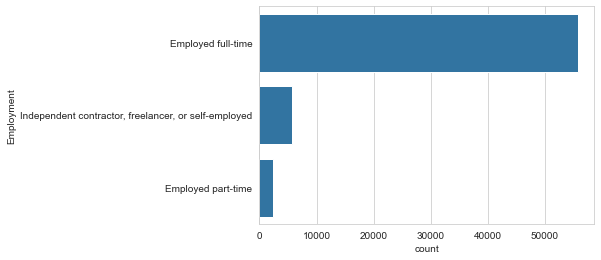

In [643]:
sns.countplot(data = data_2019_clean, y = 'Employment', color=sns.color_palette()[0]);

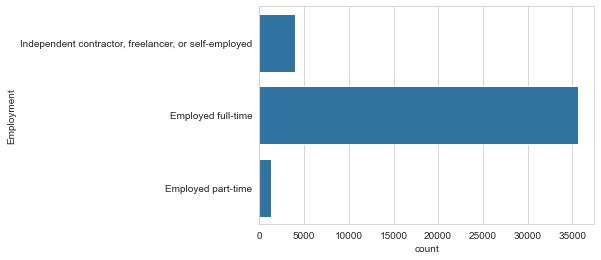

In [644]:
sns.countplot(data = data_2020_clean, y = 'Employment', color=sns.color_palette()[0]);

There are small differences between 2020 and 2019 concerning the status of employment. Lets try to take this into account. Drop the part time employment to get a better comparison with the fully emplyed

In [645]:
data_2020_clean = data_2020_clean[(data_2020_clean.Employment!='Employed part-time')]
data_2019_clean = data_2019_clean[(data_2019_clean.Employment!='Employed part-time')]
ks_2samp(data_2019_clean.WorkWeekHrs.values, data_2020_clean.WorkWeekHrs.values)
#Results with part time work
#KstestResult(statistic=0.015716507779333838, pvalue=8.055964669564763e-06)

KstestResult(statistic=0.01920323910327179, pvalue=3.637725309749739e-08)

Lets have a look at the distribution of the working hours regarding the art of emplyoment.

In [646]:
data_2020_clean = data_2020_clean.replace({'Employment': {'Employed full-time': 'Employed full-time 2020',
                                            'Independent contractor, freelancer, or self-employed': 'Independent 2020'}})

In [647]:
data_2019_clean = data_2019_clean.replace({'Employment': {'Employed full-time': 'Employed full-time 2019',
                                            'Independent contractor, freelancer, or self-employed': 'Independent 2019'}})

In [648]:
boxplot = pd.concat([data_2019_clean, data_2020_clean])
#boxplot2 = pd.melt(box_plot, id_vars=['Employment'], var_name=)
boxplot.groupby('Employment').WorkWeekHrs.describe()

,count,mean,std,min,25%,50%,75%,max
Employment,,,,,,,,
Employed full-time 2019,55838.0,40.930436,8.593695,1.0,40.0,40.0,44.0,120.0
Employed full-time 2020,35667.0,40.401254,9.330885,1.0,40.0,40.0,43.0,120.0
Independent 2019,5618.0,39.738604,15.280310,1.0,32.0,40.0,45.0,120.0
Independent 2020,3947.0,39.973271,15.634429,1.0,32.0,40.0,48.0,120.0


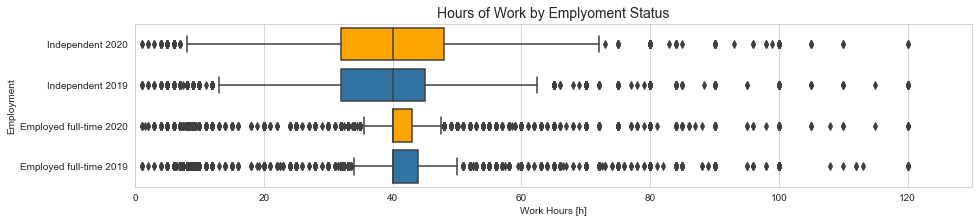

In [649]:
plt.figure(figsize=(15,3))
#sns.set_style("whitegrid")
plt.xlim(0,130)
base_color = sns.color_palette()[0]
base_color2 = sns.color_palette()[0]
ax = sns.boxplot(data = boxplot, x = 'WorkWeekHrs', y = 'Employment', order= ['Independent 2020', 'Independent 2019',
                                                                        'Employed full-time 2020', 'Employed full-time 2019'], color = base_color)
mybox1 = ax.artists[0]
mybox1.set_facecolor('orange')

mybox2 = ax.artists[2]
mybox2.set_facecolor('orange')

plt.title('Hours of Work by Emplyoment Status', fontsize = 14)
plt.xlabel('Work Hours [h]', fontsize = 10)
plt.ylabel('Employment', fontsize = 10);

# 2. How did job Satisfaction change during the pandemic

To answer the question we look at how the distribution of job satisfaction.

### Prepare the data 


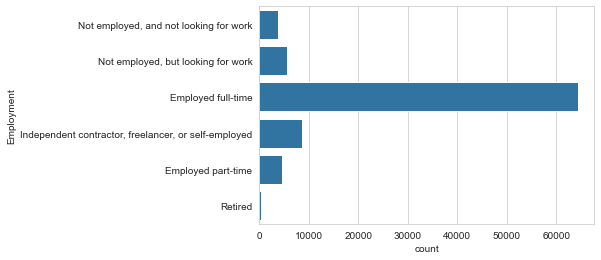

In [650]:
#How do the two years differ in employment status
sns.countplot(data = data_2019, y = 'Employment', color=sns.color_palette()[0]);


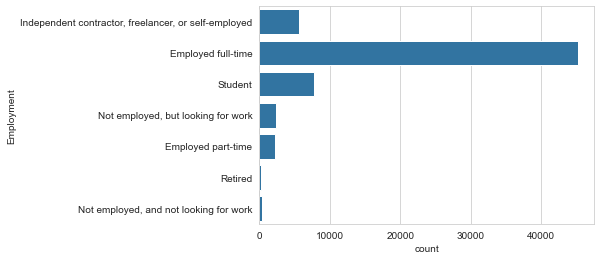

In [651]:
sns.countplot(data = data_2020, y = 'Employment', color=sns.color_palette()[0]);

In [652]:
#lets look at the percentages of emplyoment, to make sure, that we are dealing with some sort of similar data
employment = pd.DataFrame()

employment['2020'] = data_2020.Employment.value_counts()/data_2020.shape[0]
employment['2019'] = data_2019.Employment.value_counts()/data_2019.shape[0]
employment


,2020,2019
Employed full-time,0.702285,0.724998
Student,0.120802,NaN
"Independent contractor, freelancer, or self-employed",0.087991,0.095755
"Not employed, but looking for work",0.036348,0.063004
Employed part-time,0.034393,0.050280
"Not employed, and not looking for work",0.004995,0.042787
Retired,0.003770,0.004028


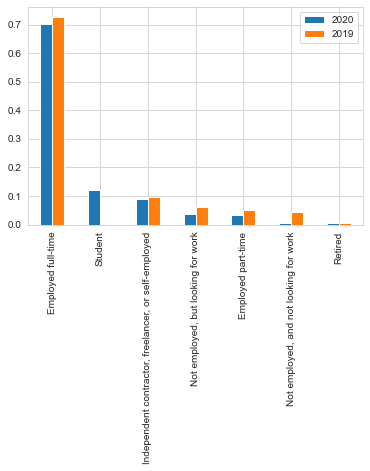

In [653]:
employment.plot.bar(rot=90);

It seems that the percentage of the different employment status is quit similar, with minor differences. That means the data is not scewed to on or the other employment status in the different years. For the following job satisfaction just look at the people that are employed.

In [654]:
#Drop the rows that are unemployed
satis_2019 = data_2019[(data_2019.Employment!='Retired')& (data_2019.Employment!='Not employed, but looking for work') & (data_2019.Employment!='Not employed, and not looking for work')]
satis_2020 = data_2020[(data_2020.Employment!='Retired')& (data_2020.Employment!='Not employed, but looking for work') & (data_2020.Employment!='Not employed, and not looking for work') & (data_2020.Employment!='Student')]

satis_2019 = satis_2019.dropna(subset=['JobSat'])
satis_2020 = satis_2020.dropna(subset=['JobSat'])


In [655]:
satisfaction = pd.DataFrame()
satisfaction['2020'] = satis_2020.JobSat.value_counts()/satis_2020.shape[0]
satisfaction['2019'] = satis_2019.JobSat.value_counts()/satis_2019.shape[0]
satisfaction

,2020,2019
Very satisfied,0.323295,0.316279
Slightly satisfied,0.308227,0.341001
Slightly dissatisfied,0.157632,0.151462
Neither satisfied nor dissatisfied,0.127959,0.122838
Very dissatisfied,0.082887,0.068420


<AxesSubplot:>

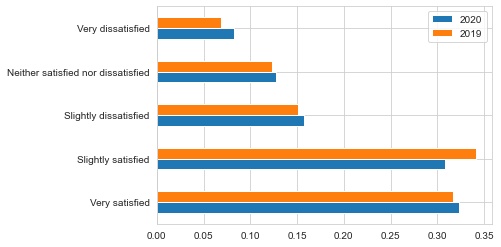

In [656]:
satisfaction.plot.barh()

In [657]:
#Lets look at the percantage of jobsatisfaction per catergory
satisfaction = pd.DataFrame()
satisfaction['2020'] = data_2020.JobSat.value_counts()/data_2020.JobSat.shape[0]
satisfaction['2019'] = data_2019.JobSat.value_counts()/data_2019.JobSat.shape[0]
satisfaction

,2020,2019
Very satisfied,0.226664,0.252602
Slightly satisfied,0.216100,0.272347
Slightly dissatisfied,0.110516,0.120968
Neither satisfied nor dissatisfied,0.089713,0.098106
Very dissatisfied,0.058113,0.054645


<AxesSubplot:>

<Figure size 1080x1440 with 0 Axes>

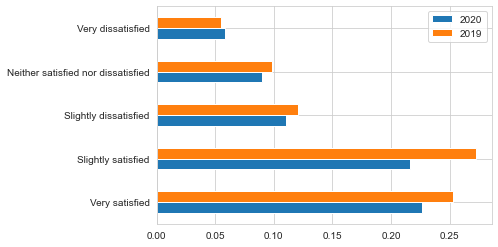

In [658]:
plt.figure(figsize=(15,20))
satisfaction.plot.barh()

# 3. How did job satisfaction change depending on working hours

In [659]:
satis_2019.JobSat.value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

#converting job satisfaction into numerical
satis_2019 = satis_2019.replace({'JobSat': {'Slightly satisfied': 1,
                                            'Very satisfied': 2,
                                            'Slightly dissatisfied': -1,
                                            'Neither satisfied nor dissatisfied': 0,
                                            'Very dissatisfied': -2,}})

In [660]:
satis_2020.JobSat.value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

satis_2020 = satis_2020.replace({'JobSat': {'Slightly satisfied': 1,
                                            'Very satisfied': 2,
                                            'Slightly dissatisfied': -1,
                                            'Neither satisfied nor dissatisfied': 0,
                                            'Very dissatisfied': -2,}})

In [661]:
print(satis_2019.JobSat.describe())
print(satis_2020.JobSat.describe())

count                  70988
unique                     5
top       Slightly satisfied
freq                   24207
Name: JobSat, dtype: object
count              45194
unique                 5
top       Very satisfied
freq               14611
Name: JobSat, dtype: object


In [662]:
satis_2019.WorkWeekHrs.describe()

count    64406.000000
mean        42.124757
std         37.286842
min          1.000000
25%         40.000000
50%         40.000000
75%         44.000000
max       4850.000000
Name: WorkWeekHrs, dtype: float64

In [663]:
#prepare the data to compare work hours with job satisfaction
satis_2019_time = satis_2019.dropna(subset=['WorkWeekHrs'], axis=0)
satis_2020_time = satis_2020.dropna(subset=['WorkWeekHrs'], axis=0)

satis_2020_time = satis_2020_time[(satis_2020_time.WorkWeekHrs <= 120)]
satis_2019_time = satis_2019_time[(satis_2019_time.WorkWeekHrs <= 120)]

In [664]:
#combine the satisfaction dataset with a new column year to compare within a violin plot
satis_2020_time['year'] = "2020"
satis_2019_time['year'] = "2019"
violin_plot = pd.concat([satis_2020_time, satis_2019_time])
violin_plot.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,ScreenName,SOVisit1st,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOJobs,EntTeams,SONewContent,Dependents
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


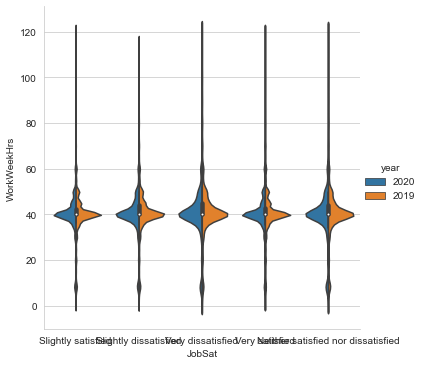

In [665]:
#Data plot with violin plot
sns.catplot(x='JobSat', y='WorkWeekHrs', hue='year',  kind="violin", split=True, data=violin_plot,)

<Figure size 1080x720 with 0 Axes>

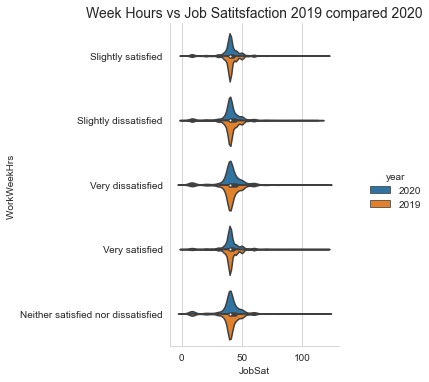

In [666]:
# plotting a scatter plot of relationship between job satisfaction and working hours
plt.figure(figsize=(15,10))
sns.catplot(x='WorkWeekHrs', y='JobSat', hue='year',  kind="violin", split=True, data=violin_plot,)
plt.title("Week Hours vs Job Satitsfaction 2019 compared 2020", fontsize=14)
plt.xlabel("JobSat")
plt.ylabel("WorkWeekHrs ");

The Plots dont seem very interesting. I will try another angle.

# 4. How does work satisfatcon correlate to income

In [737]:
#Drop the NA values for work hours and compensation
comp_2019 = data_2019.copy()
comp_2019.dropna(subset=['WorkWeekHrs', 'CompTotal'], inplace=True)
comp_2020 = data_2020.copy()
comp_2020.dropna(subset=['WorkWeekHrs', 'CompTotal'], inplace=True)

In [764]:
#only look at the yearly income data, to have a better comperison for people who 
#have their job the whole year
comp_2019 = comp_2019[comp_2019.CompFreq == 'Yearly']
comp_2020 = comp_2020[comp_2020.CompFreq == 'Yearly']

In [739]:
comp_2019.WorkWeekHrs.describe()

count    30335.000000
mean        42.021198
std         33.555277
min          1.000000
25%         40.000000
50%         40.000000
75%         43.000000
max       4850.000000
Name: WorkWeekHrs, dtype: float64

The Weekly hours seem a bit high, lets limit the outliers

In [740]:
comp_2020 = comp_2020[(comp_2020.WorkWeekHrs <= 120)]
comp_2019 = comp_2019[(comp_2019.WorkWeekHrs <= 120)]

In [741]:
comp_2019.CompTotal.describe()

count    3.023400e+04
mean     9.296084e+05
std      2.476615e+07
min      0.000000e+00
25%      5.500000e+04
50%      9.000000e+04
75%      1.400000e+05
max      3.000000e+09
Name: CompTotal, dtype: float64

A Billio Dollars a year seem a bit high, it somebody propably entered non dollar values. 

In [742]:
comp_2019.ConvertedComp.describe()

count    3.023300e+04
mean     8.757367e+04
std      7.559176e+04
min      0.000000e+00
25%      4.827900e+04
50%      7.458300e+04
75%      1.100000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

This seem to be the dollar equvialent. Lets continue with that value

In [743]:
comp_2019['CompHour'] = (comp_2019['ConvertedComp']/comp_2019['WorkWeekHrs'])/52
comp_2020['CompHour'] = (comp_2020['ConvertedComp']/comp_2020['WorkWeekHrs'])/52

In [744]:
comp_2019.CompHour.describe()

count    30233.000000
mean        42.988940
std        118.351190
min          0.000000
25%         23.728304
50%         35.812370
75%         52.329808
max      19230.769231
Name: CompHour, dtype: float64

The Max Compensation per Hour seems a little high. Lets Drop outliers that are above 150$ per hour.

In [745]:
comp_2019['Year'] = '2019'
comp_2020['Year'] = '2020'
comp_plot = pd.concat([comp_2019, comp_2020])

In [746]:
comp_plot.groupby('JobSat')['CompHour'].mean()

JobSat
Neither satisfied nor dissatisfied    37.804502
Slightly dissatisfied                 40.614613
Slightly satisfied                    40.876709
Very dissatisfied                     39.893233
Very satisfied                        47.715505
Name: CompHour, dtype: float64

In [747]:
comp_plot = comp_plot[(comp_plot.CompHour <= 150)]

In [748]:
comp_plot.groupby('JobSat')['CompHour'].mean()

JobSat
Neither satisfied nor dissatisfied    34.919556
Slightly dissatisfied                 36.127726
Slightly satisfied                    38.611088
Very dissatisfied                     36.934632
Very satisfied                        44.077588
Name: CompHour, dtype: float64

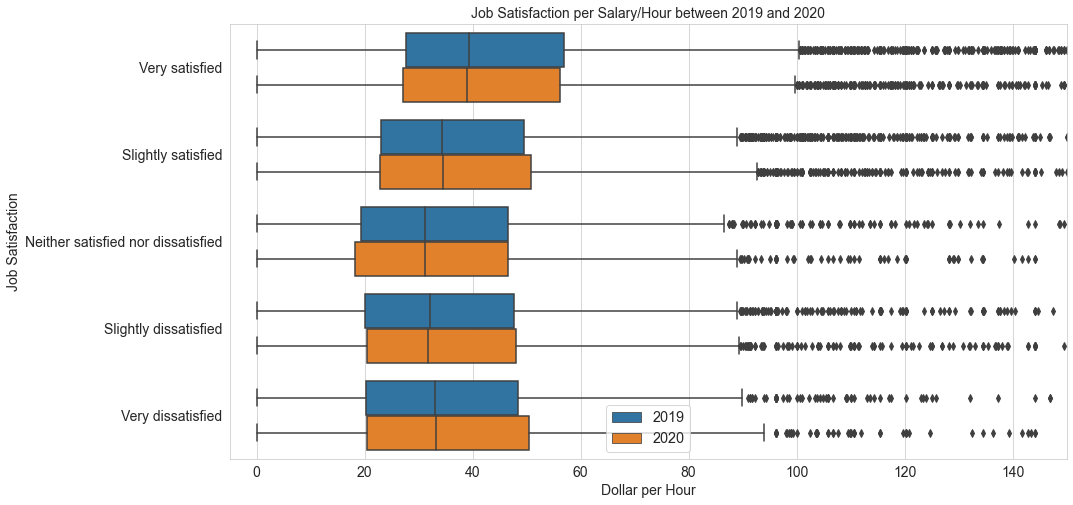

In [763]:
plt.figure(figsize=(15,8))
plt.xlim(-5,150)
sns.boxplot(data=comp_plot, x= 'CompHour', y='JobSat', hue='Year',
           order = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 
                   'Slightly dissatisfied', 'Very dissatisfied'])
plt.title('Job Satisfaction per Salary/Hour between 2019 and 2020', fontsize = 14)
plt.ylabel('Job Satisfaction', fontsize = 14)
plt.xlabel('Dollar per Hour', fontsize = 14)
plt.tick_params(labelsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')

# Blopost:

https://medium.com/@sascha.pava/how-did-the-pandemic-change-our-work-5ff06e75f6ff